In [6]:
pip install bubbly

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as py
import plotly.express as px
from bubbly.bubbly import bubbleplot
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics, tree
from mlxtend.plotting import plot_decision_regions
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [8]:
data = pd.read_csv("/content/Bank_Personal_Loan_Modelling.csv")

In [9]:
data.head(5)

ID_Customer  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0            1   25           1      49     91107       4    1.6          1   
1            2   45          19      34     90089       3    1.5          1   
2            3   39          15      11     94720       1    1.0          1   
3            4   35           9     100     94112       1    2.7          2   
4            5   35           8      45     91330       4    1.0          2   

   Mortgage  Personal Loan  Securities Account  CD Account  Online  CreditCard  
0         0              0                   1           0       0           0  
1         0              0                   1           0       0           0  
2         0              0                   0           0       0           0  
3         0              0                   0           0       0           0  
4         0              0                   0           0       0           1

In [10]:
l=[]
def check(data):
  for col in data.columns:
    dtype = data[col].dtype
    nunique = data[col].nunique()
    sum_null = data[col].isnull().sum()
    l.append([col, dtype, nunique, sum_null])
  df_check = pd.DataFrame(l)
  df_check.columns=['column','dtypes','nunique','sum_null']
  return df_check

check(data)

column   dtypes  nunique  sum_null
0          ID_Customer    int64     5000         0
1                  Age    int64       45         0
2           Experience    int64       47         0
3               Income    int64      162         0
4             ZIP Code    int64      467         0
5               Family    int64        4         0
6                CCAvg  float64      108         0
7            Education    int64        3         0
8             Mortgage    int64      347         0
9        Personal Loan    int64        2         0
10  Securities Account    int64        2         0
11          CD Account    int64        2         0
12              Online    int64        2         0
13          CreditCard    int64        2         0



*   There are 5000 observations in this dataset.
*   All values are of a numerical type (int, float).
*   There are zero missing values in all columns. We will confirm.
*   id has 5000 unique values. We can drop this column
*   We can change family, education to categorical

In [11]:
data.drop(['ID_Customer'], inplace=True, axis=1)

In [12]:
data.describe().style.background_gradient(cmap='Oranges')



*   In the work experience section, it shows that the lowest they give is -3, which is wrong

*   In the zip code, it shows that the lowest amount is probably a low number. It should be removed



In [13]:
data[data['Experience']<0]

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
89     25          -1     113     94303       4   2.30          3         0   
226    24          -1      39     94085       2   1.70          2         0   
315    24          -2      51     90630       3   0.30          3         0   
451    28          -2      48     94132       2   1.75          3        89   
524    24          -1      75     93014       4   0.20          1         0   
536    25          -1      43     92173       3   2.40          2       176   
540    25          -1     109     94010       4   2.30          3       314   
576    25          -1      48     92870       3   0.30          3         0   
583    24          -1      38     95045       2   1.70          2         0   
597    24          -2     125     92835       2   7.20          1         0   
649    25          -1      82     92677       4   2.10          3         0   
670    23          -1      61     92374       4   2.60          1       239   
686    24          -1      38     92612       4   0.60          2         0   
793    24          -2     150     94720       2   2.00          1         0   
889    24          -2      82     91103       2   1.60          3         0   
909    23          -1     149     91709       1   6.33          1       305   
1173   24          -1      35     94305       2   1.70          2         0   
1428   25          -1      21     94583       4   0.40          1        90   
1522   25          -1     101     94720       4   2.30          3       256   
1905   25          -1     112     92507       2   2.00          1       241   
2102   25          -1      81     92647       2   1.60          3         0   
2430   23          -1      73     92120       4   2.60          1         0   
2466   24          -2      80     94105       2   1.60          3         0   
2545   25          -1      39     94720       3   2.40          2         0   
2618   23          -3      55     92704       3   2.40          2       145   
2717   23          -2      45     95422       4   0.60          2         0   
2848   24          -1      78     94720       2   1.80          2         0   
2876   24          -2      80     91107       2   1.60          3       238   
2962   23          -2      81     91711       2   1.80          2         0   
2980   25          -1      53     94305       3   2.40          2         0   
3076   29          -1      62     92672       2   1.75          3         0   
3130   23          -2      82     92152       2   1.80          2         0   
3157   23          -1      13     94720       4   1.00          1        84   
3279   26          -1      44     94901       1   2.00          2         0   
3284   25          -1     101     95819       4   2.10          3         0   
3292   25          -1      13     95616       4   0.40          1         0   
3394   25          -1     113     90089       4   2.10          3         0   
3425   23          -1      12     91605       4   1.00          1        90   
3626   24          -3      28     90089       4   1.00          3         0   
3796   24          -2      50     94920       3   2.40          2         0   
3824   23          -1      12     95064       4   1.00          1         0   
3887   24          -2     118     92634       2   7.20          1         0   
3946   25          -1      40     93117       3   2.40          2         0   
4015   25          -1     139     93106       2   2.00          1         0   
4088   29          -1      71     94801       2   1.75          3         0   
4116   24          -2     135     90065       2   7.20          1         0   
4285   23          -3     149     93555       2   7.20          1         0   
4411   23          -2      75     90291       2   1.80          2         0   
4481   25          -2      35     95045       4   1.00          3         0   
4514   24          -3      41     91768       4   1.00  

In [14]:
data.Experience = data.Experience.replace(-1, 1)
data.Experience = data.Experience.replace(-2, 2)
data.Experience = data.Experience.replace(-3, 3)

In [15]:
zipcode = data.sort_values(by='ZIP Code', ascending=True)
zipcode

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
384    51          25      21      9307       4   0.60          3         0   
652    34           9      92     90005       1   2.80          1         0   
1619   45          21      29     90005       1   0.30          3         0   
1681   32           8     141     90005       2   4.33          1         0   
4186   33           9      10     90005       4   1.00          1        81   
...   ...         ...     ...       ...     ...    ...        ...       ...   
3525   59          34      13     96651       4   0.90          2         0   
1426   37          11      60     96651       3   0.50          3         0   
2731   29           5      28     96651       1   0.20          3         0   
672    51          27      23     96651       1   0.20          1         0   
1653   26           1      24     96651       2   0.90          3       123   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
384               0                   0           0       1           1  
652               0                   0           0       1           0  
1619              0                   0           0       1           0  
1681              0                   0           0       0           0  
4186              0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
3525              0                   0           0       0           0  
1426              0                   0           0       1           0  
2731              0                   0           0       1           0  
672               0                   0           0       1           0  
1653              0                   0           0       0           1  

[5000 rows x 13 columns]

In [16]:
#We will completely remove the zip code above, which we found to be wrong
zipNoise = data[data['ZIP Code']==9307]
data.drop(zipNoise.index, inplace=True)

In [17]:
num_col=['Age','Experience','Income','ZIP Code','CCAvg','Mortgage']
cat_col=['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']

In [18]:
figure = bubbleplot(dataset =data, x_column = 'Experience', y_column = 'Income',
    bubble_column = 'Personal Loan', time_column = 'Age', size_column = 'Mortgage', color_column = 'Personal Loan',
    x_title = "Experience", y_title = "Income", title = 'Experience vs Income. vs Age vs Mortgage vs Personal Loan',
    x_logscale = False, scale_bubble = 3, height = 650)

py.iplot(figure, config={'scrollzoom': True})

/usr/local/lib/python3.10/dist-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/

In [19]:
plt.style.use('fivethirtyeight')
def fig(df,var):
    fig2 = px.histogram(df,x=var,color=var,template='plotly_dark')
    fig2.show()

In [20]:
for i in cat_col:
    fig(data,i)

In [21]:
def histogram_boxplot(feature, figsize=(15, 7), bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots

    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='yellow', orient="h") # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=True, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=True, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='blue', linestyle='-');# Add median to the histogram

In [22]:
def create_outliers(feature: str, data=data):
    """
    Returns dataframe object of feature outliers.
    feature: 1-d feature array
    data: pandas dataframe (default is df)
    """
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    #print(((df.Mileage < (Q1 - 1.5 * IQR)) | (df.Mileage > (Q3 + 1.5 * IQR))).sum())
    return data[((data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR)))]

<ipython-input-21-6564120097c3>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




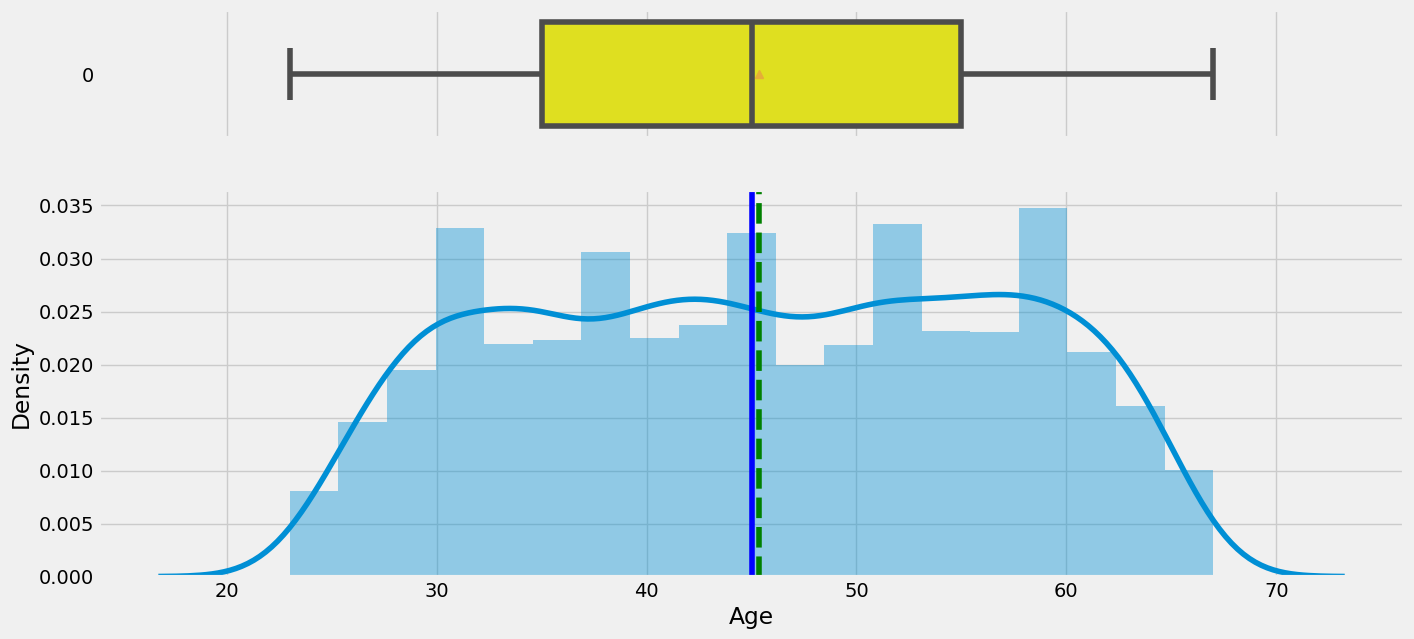

In [23]:
histogram_boxplot(data.Age)

<ipython-input-21-6564120097c3>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




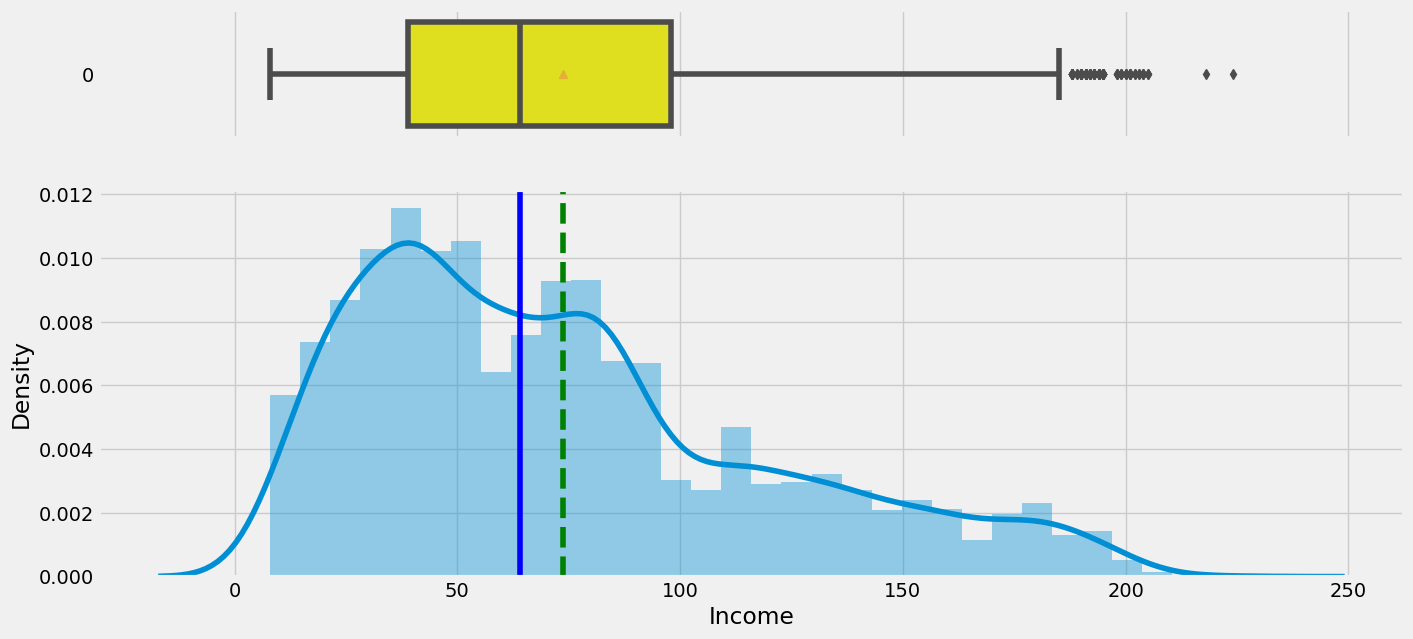

In [24]:
histogram_boxplot(data.Income)


The average income is about 60K, with a median value of about 70K.
income column is right skewed and has many outliers to the upside

In [25]:
outliers = create_outliers('Income')
outliers.sort_values(by='Income', ascending=False).head(20)

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
3896   48          24     224     93940       2   6.67          1         0   
4993   45          21     218     91801       2   6.67          1         0   
526    26           2     205     93106       1   6.33          1       271   
2988   46          21     205     95762       2   8.80          1       181   
4225   43          18     204     91902       2   8.80          1         0   
677    46          21     204     92780       2   2.80          1         0   
2278   30           4     204     91107       2   4.50          1         0   
3804   47          22     203     95842       2   8.80          1         0   
2101   35           5     203     95032       1  10.00          3         0   
787    45          15     202     91380       3  10.00          3         0   
3608   59          35     202     94025       1   4.70          1       553   
4895   45          20     201     92120       2   2.80          1         0   
2337   43          16     201     95054       1  10.00          2         0   
2447   44          19     201     95819       2   8.80          1         0   
1901   43          19     201     94305       2   6.67          1         0   
1711   27           3     201     95819       1   6.33          1       158   
1716   32           8     200     91330       2   6.50          1       565   
459    35          10     200     91107       2   3.00          1       458   
917    45          20     200     90405       2   8.80          1         0   
4659   28           4     199     92121       1   6.33          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
3896              0                   0           1       1           1  
4993              0                   0           0       1           0  
526               0                   0           0       0           1  
2988              0                   1           0       1           0  
4225              0                   0           0       1           0  
677               0                   0           0       1           0  
2278              0                   0           0       1           0  
3804              0                   0           0       1           0  
2101              1                   0           0       0           0  
787               1                   0           0       0           0  
3608              0                   0           0       0           0  
4895              0                   0           0       1           1  
2337              1                   0           0       0           1  
2447              0                   0           0       1           1  
1901              0                   1           0       1           0  
1711              0                   0           0       1           0  
1716              0                   0           0       1           0  
459               0                   0           0       0           0  
917               0                   0           0       1           1  
4659              0                   0           0       0           0

In [26]:
print(f"There are {outliers.shape[0]} outliers.")

There are 96 outliers.


<ipython-input-21-6564120097c3>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




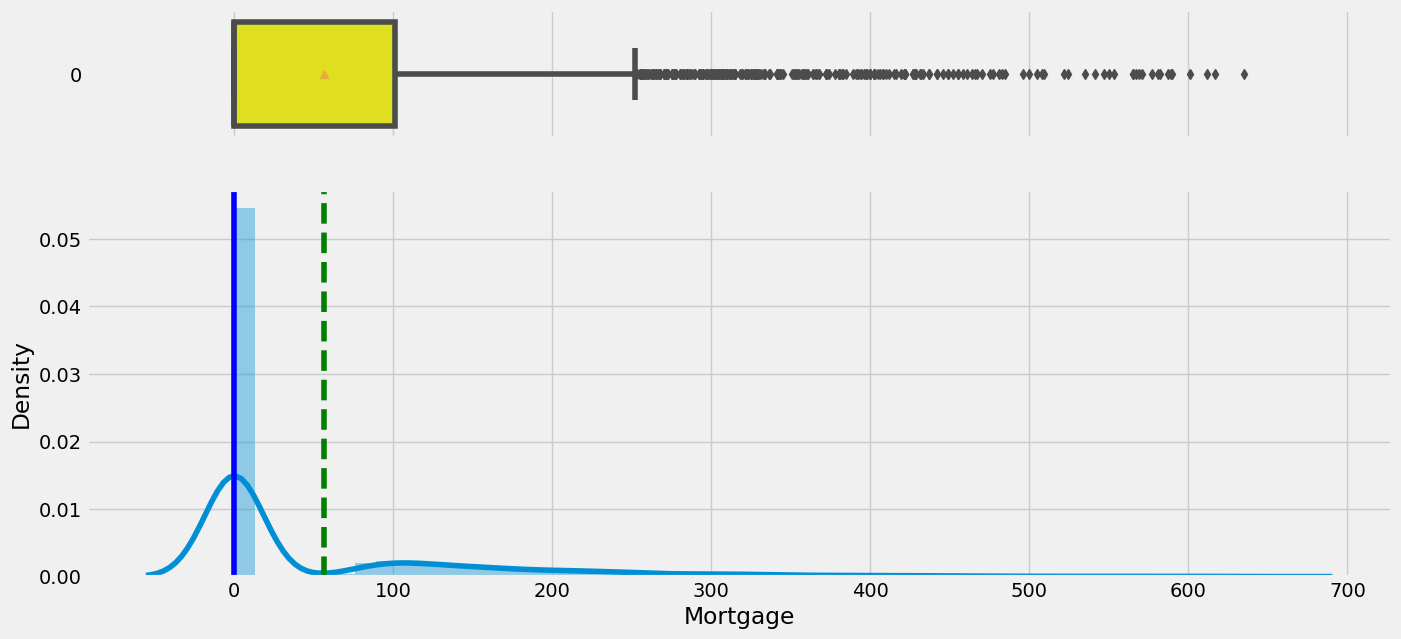

In [27]:
histogram_boxplot(data.Mortgage)


In [28]:
outliers = create_outliers('Mortgage')
outliers.sort_values(by='Mortgage', ascending=False)

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
2934   37          13     195     91763       2    6.5          1       635   
303    49          25     195     95605       4    3.0          1       617   
4812   29           4     184     92126       4    2.2          3       612   
1783   53          27     192     94720       1    1.7          1       601   
4842   49          23     174     95449       3    4.6          2       590   
...   ...         ...     ...       ...     ...    ...        ...       ...   
1522   25           1     101     94720       4    2.3          3       256   
3950   38          14      62     94143       1    1.5          3       255   
2159   61          35      99     94085       1    4.8          3       255   
3138   36          11     103     93555       1    4.6          1       255   
3948   37          12     123     94304       4    3.1          2       253   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
2934              0                   0           0       1           0  
303               1                   0           0       0           0  
4812              1                   0           0       1           0  
1783              0                   0           0       1           0  
4842              1                   0           0       0           0  
...             ...                 ...         ...     ...         ...  
1522              0                   0           0       0           1  
3950              0                   0           0       1           0  
2159              1                   0           0       0           1  
3138              0                   0           0       1           0  
3948              1                   0           1       1           1  

[291 rows x 13 columns]

In [29]:
print(f"There are {outliers.shape[0]} outliers in the outlier column and There are {data[data.Mortgage==0].shape[0]} rows where mortgage equals to ZERO!")

There are 291 outliers in the outlier column and There are 3461 rows where mortgage equals to ZERO!


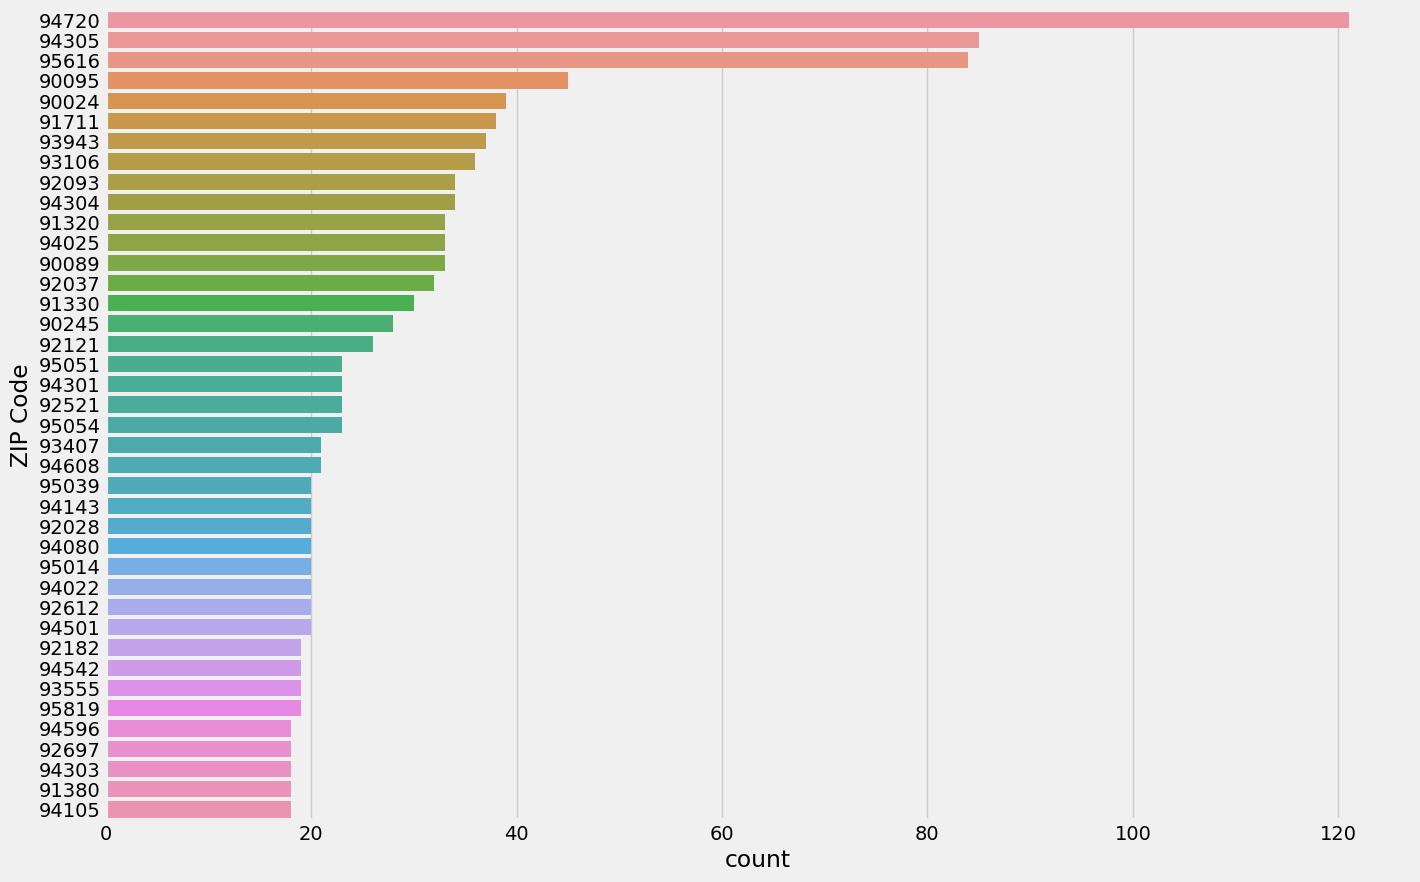

In [30]:
plt.figure(figsize=(15, 10))
sns.countplot(y=data[data.Mortgage==0]['ZIP Code'],
              data=data,
              order=data[data.Mortgage==0]['ZIP Code'].value_counts().index[:40]);

Zip code 94720 has the highest mortgage value of 0, which is around 120, followed by zip code 94305.

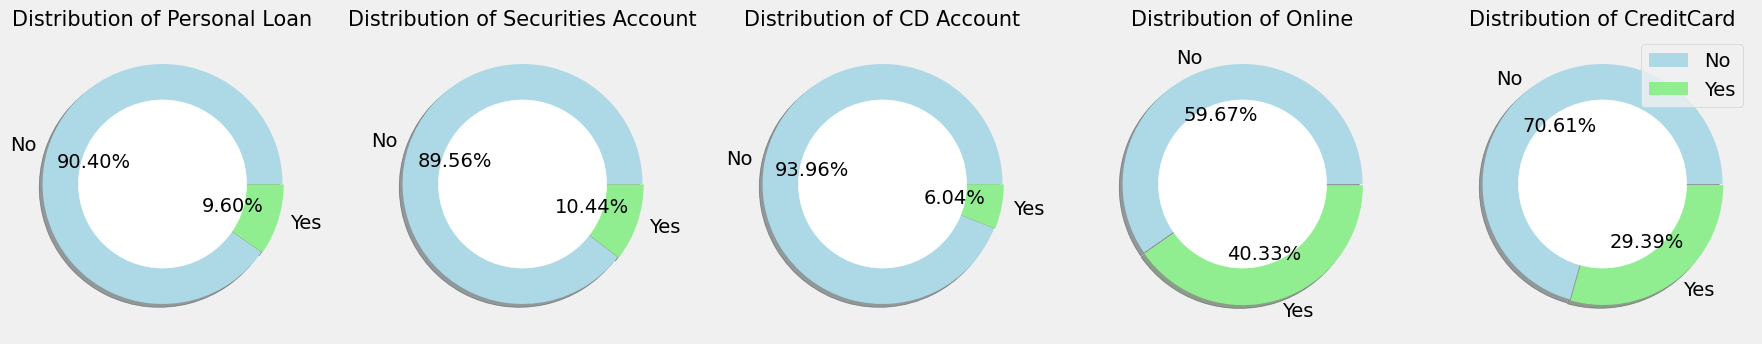

In [31]:
fig, ax = plt.subplots(1,5,figsize=(20,20))
columns = ['Personal Loan','Securities Account','CD Account','Online','CreditCard']

for i,column in enumerate(columns):
    plt.subplot(1,5,i+1)
    size = data[column].value_counts()
    colors = ['lightblue', 'lightgreen']
    labels = "No", "Yes"
    explode = [0, 0.01]

    my_circle = plt.Circle((0, 0), 0.7, color = 'white')

    plt.rcParams['figure.figsize'] = (20, 20)
    plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
    plt.title('Distribution of {}'.format(column), fontsize = 15)
    p = plt.gcf()
    p.gca().add_artist(my_circle)
plt.legend()
plt.show()

<ipython-input-21-6564120097c3>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




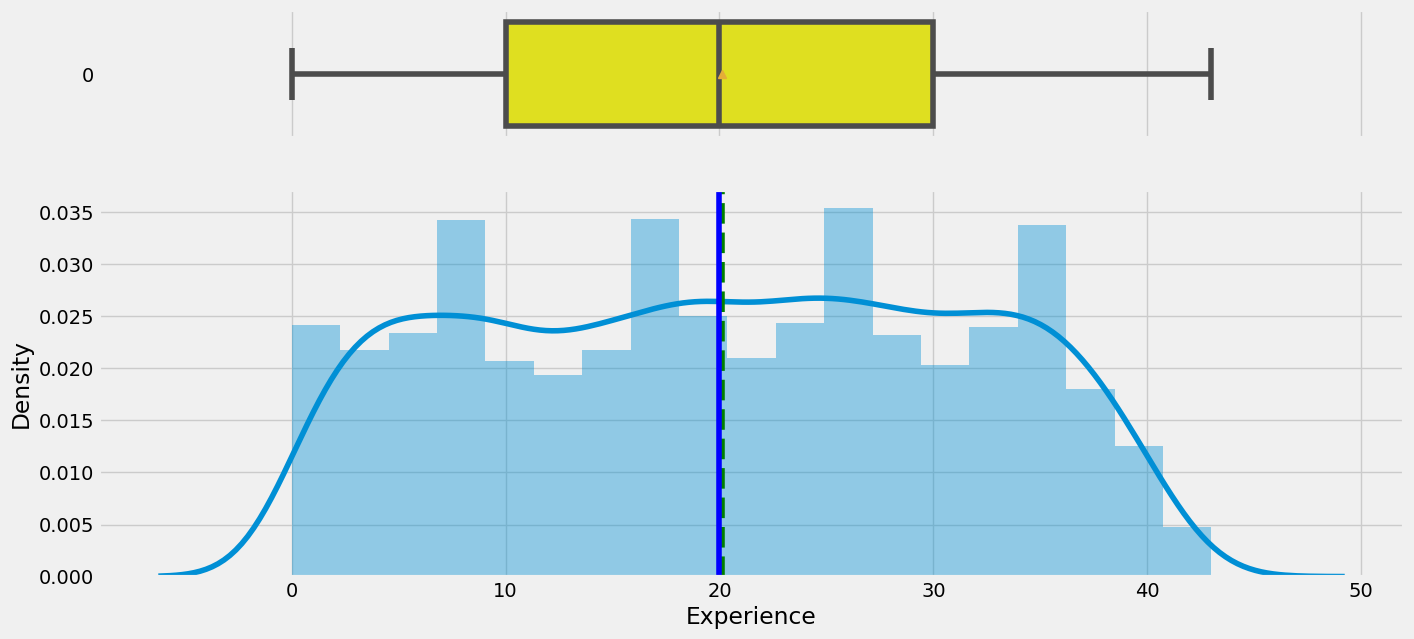

In [32]:
histogram_boxplot(data.Experience)

The work experience column does not have an outlier and the median and average of its people are close to each other and are around 20 years.

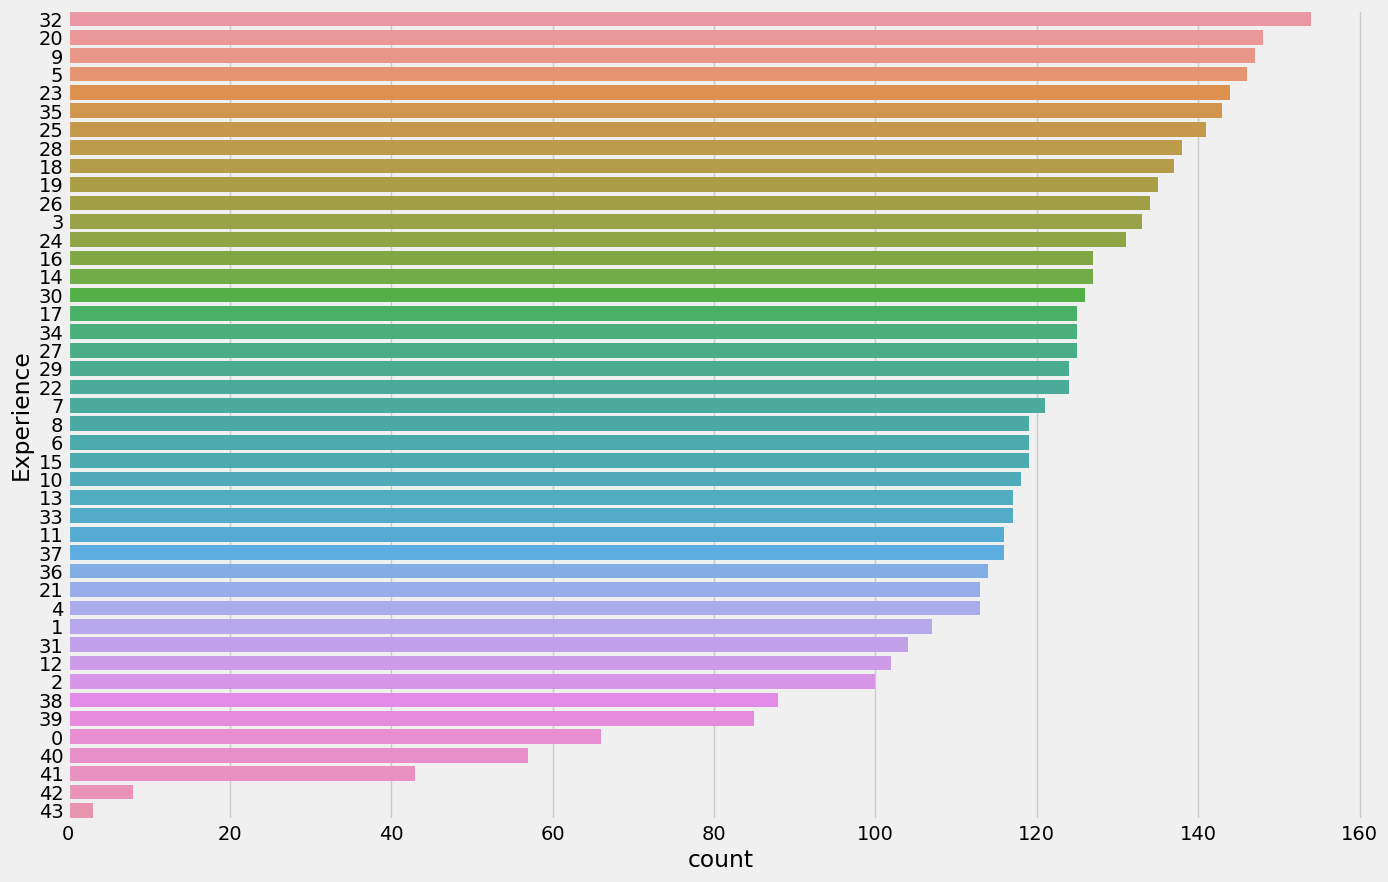

In [33]:
plt.figure(figsize=(15, 10))
sns.countplot(y=data.Experience,
              data=data,
              order=data.Experience.value_counts().index[:]);

In the plot above, it is clear that 32 years is the most repeated work experience, which is around 150.

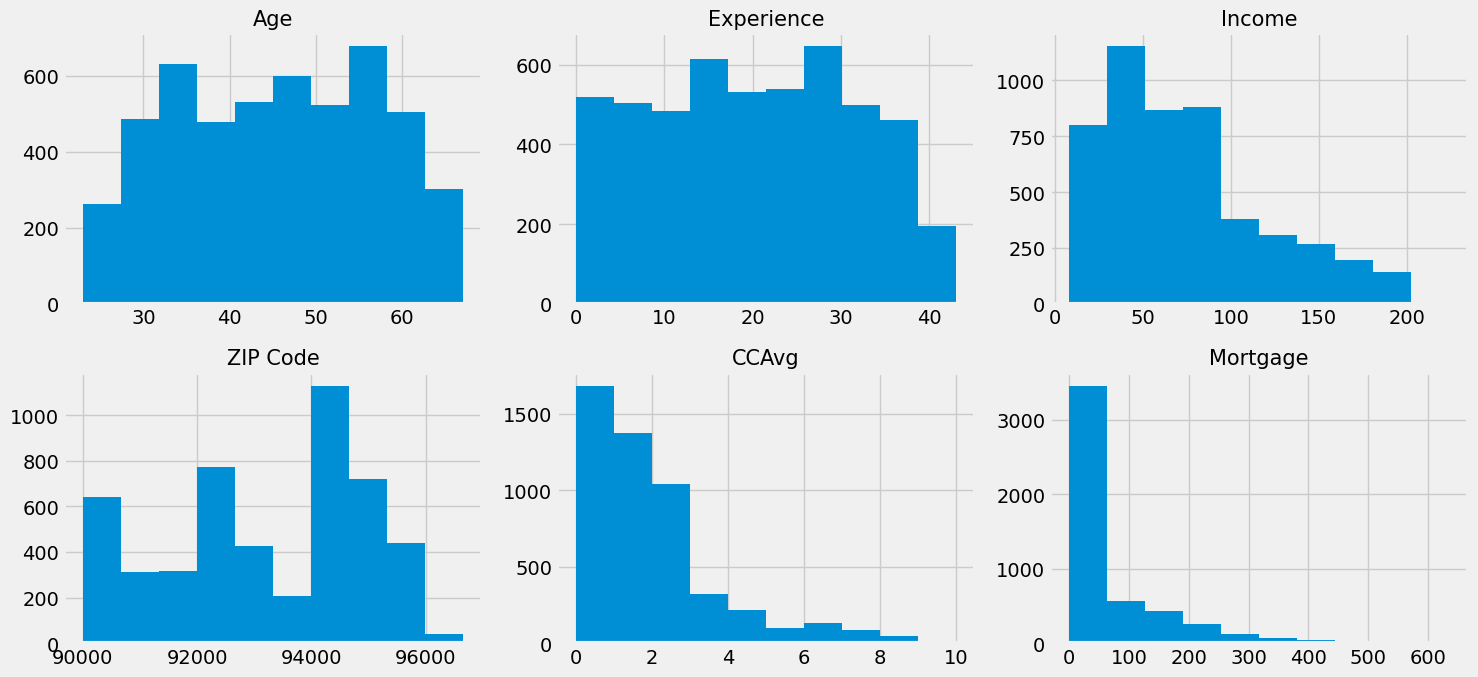

In [34]:
n_rows = math.ceil(len(num_col)/3)
plt.figure(figsize=(15, n_rows*3.5))
for i, num_col in enumerate(list(num_col)):
    plt.subplot(n_rows, 3, i+1)
    plt.hist(data[num_col])
    plt.tight_layout()
    plt.title(num_col, fontsize=15);

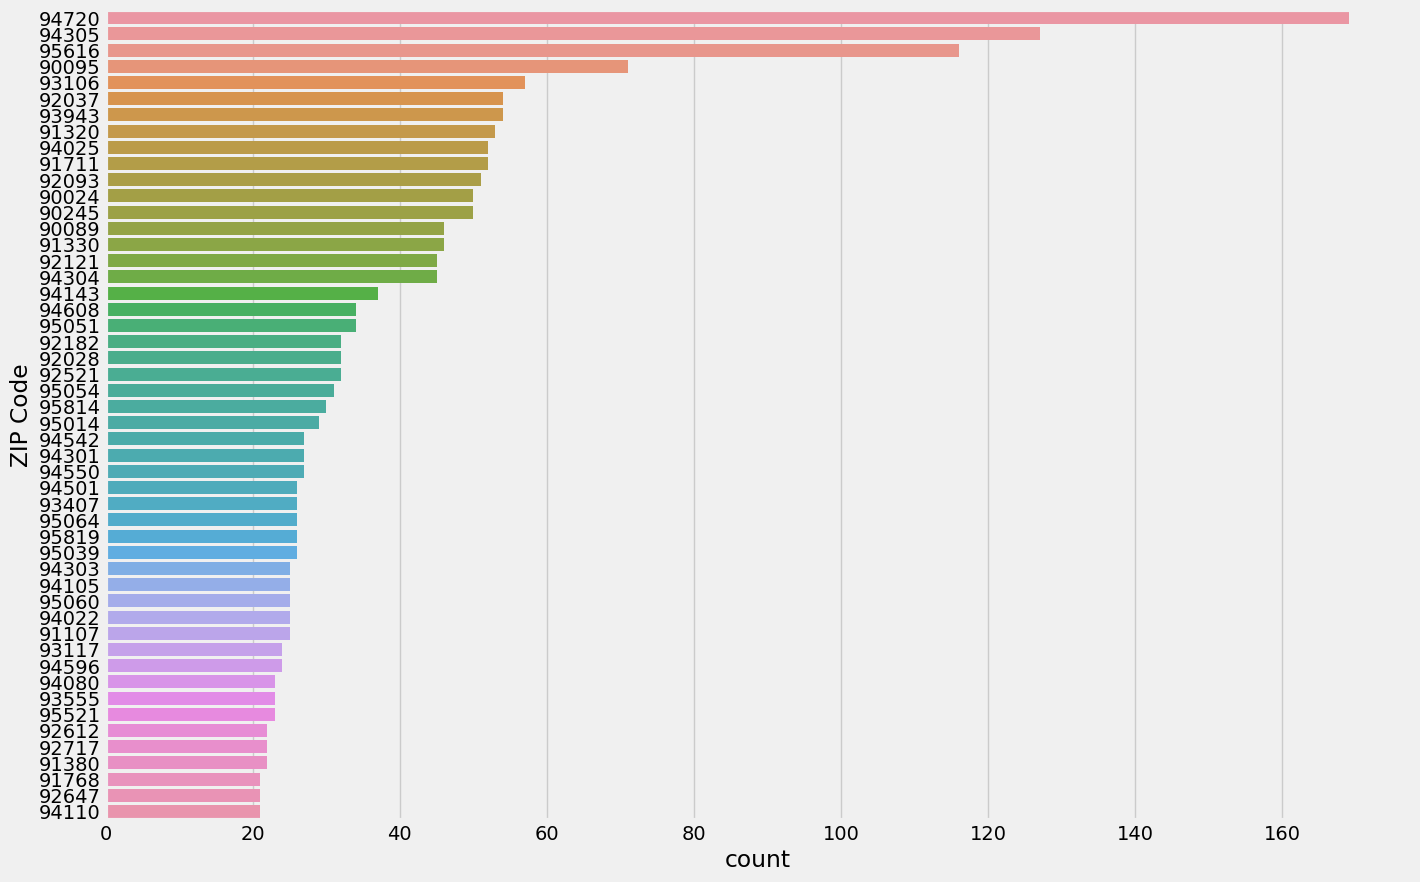

In [35]:
plt.figure(figsize=(15, 10))
sns.countplot(y="ZIP Code", data=data, order=data['ZIP Code'].value_counts().index[0:50]);

Most of the data is related to zip code 94720, which was specified above, its mortgage price is 0.

In [36]:
## Function to plot stacked bar chart
def stacked_plot(x, y):
    """
    Shows stacked plot from x and y pandas data series
    x: pandas data series
    y: pandas data series
    """
    info = pd.crosstab(x, y, margins=True)
    info['% - 0'] = round(info[0]/info['All']*100, 2)
    info['% - 1'] = round(info[1]/info['All']*100, 2)
    print(info)
    print('='*80)
    visual = pd.crosstab(x, y, normalize='index')
    visual.plot(kind='bar', stacked=True, figsize=(10,5));

In [37]:
def show_boxplots(cols: list, feature: str, show_fliers=True, data=data): #method call to show bloxplots
    n_rows = math.ceil(len(cols)/2)
    plt.figure(figsize=(15, n_rows*5))
    for i, variable in enumerate(cols):
        plt.subplot(n_rows, 2, i+1)
        if show_fliers:
            sns.boxplot(x=data[feature], y=data[variable], palette="mako", showfliers=True)
        else:
            sns.boxplot(x=data[feature], y=data[variable], palette="mako", showfliers=False)
        plt.tight_layout()
        plt.title(variable, fontsize=12)
    plt.show()

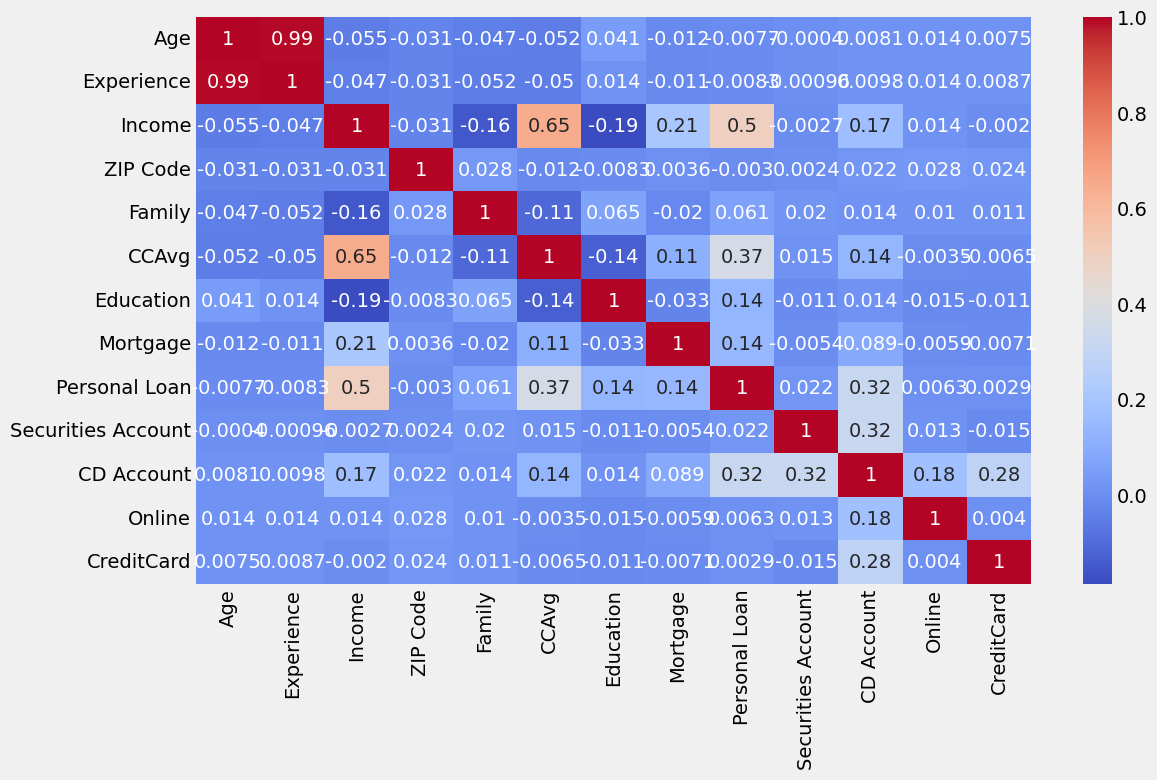

In [38]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm");

Obviously, people's age has a very direct relationship with their work experience, and the average use of their card has a close relationship with their income.

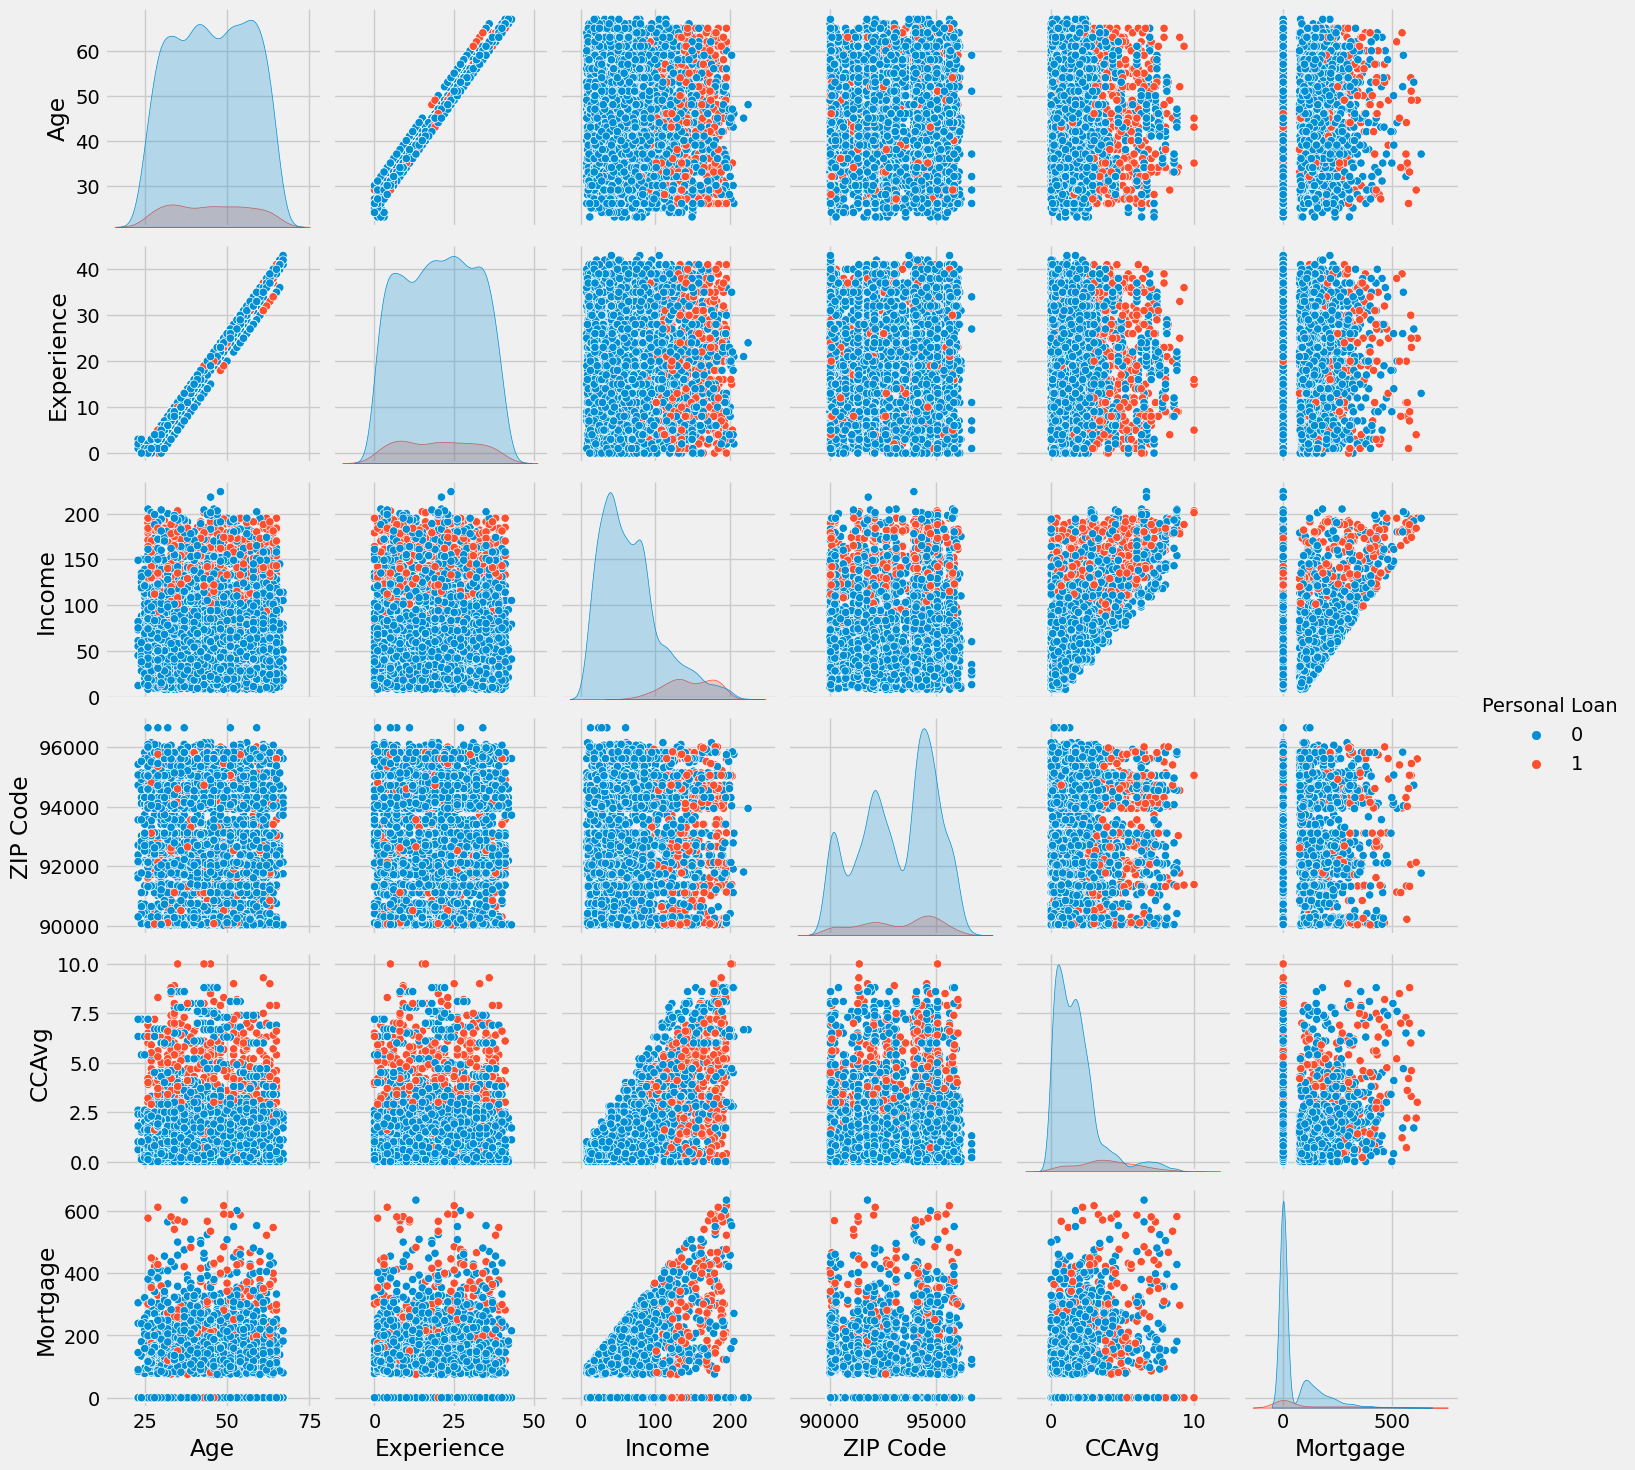

In [39]:
sns.pairplot(data=data[['Age','Experience','Income','ZIP Code','CCAvg','Mortgage','Personal Loan']],
             hue='Personal Loan');


According to the plot above, it can be said that people with higher income have taken the loan. It also seems that people who have used their card more have taken the loan, which needs to be checked

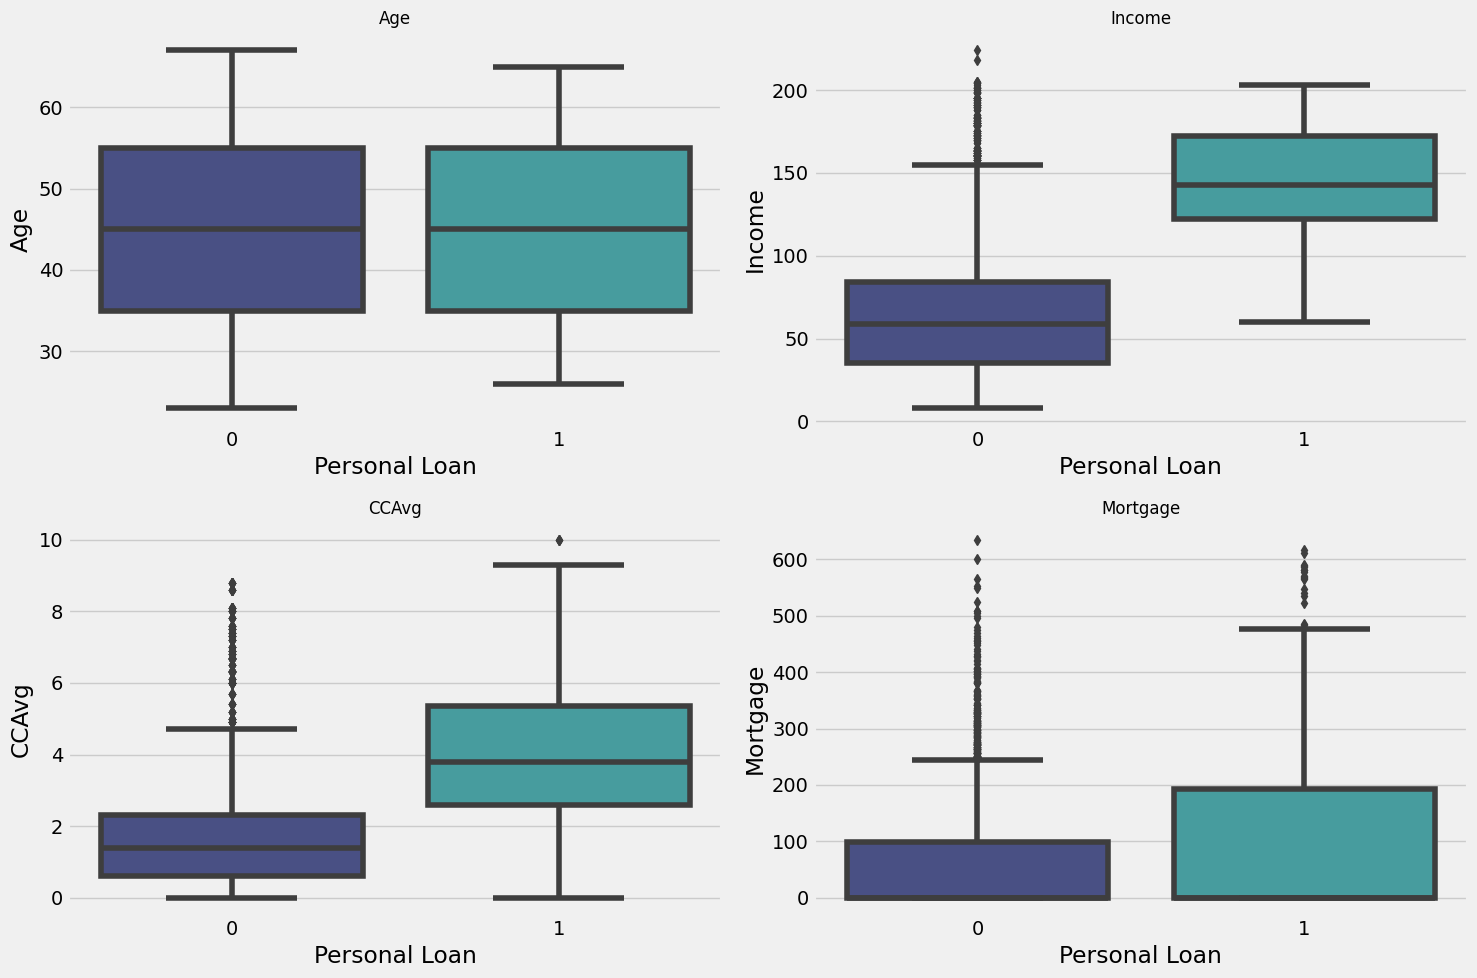

In [40]:
cols = ['Age','Income','CCAvg','Mortgage']
show_boxplots(cols, 'Personal Loan',show_fliers=True, data=data)

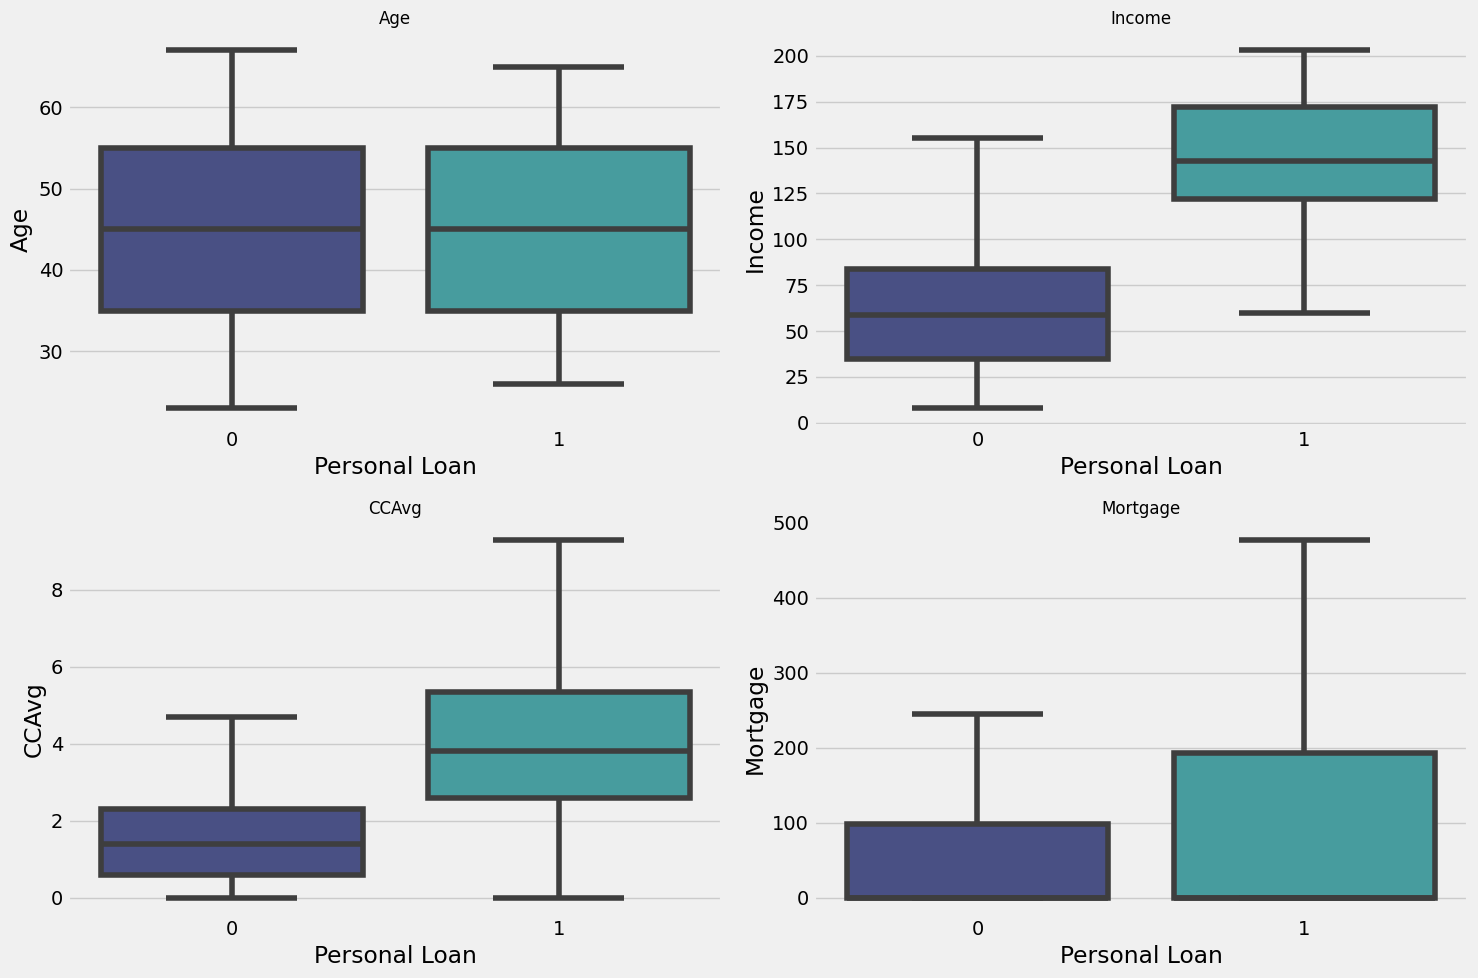

In [41]:
# We remove the outer layers and redraw the plot
show_boxplots(cols, 'Personal Loan', show_fliers=False);

On average, people with higher income accepted the loan.
On average, people who use credit cards more often accept loans
According to the average plot, the people who accepted the loan had a house mortgage of 500 thousand or less.

Personal Loan     0    1   All  % - 0  % - 1
Family                                      
1              1365  107  1472  92.73   7.27
2              1190  106  1296  91.82   8.18
3               877  133  1010  86.83  13.17
4              1087  134  1221  89.03  10.97
All            4519  480  4999  90.40   9.60


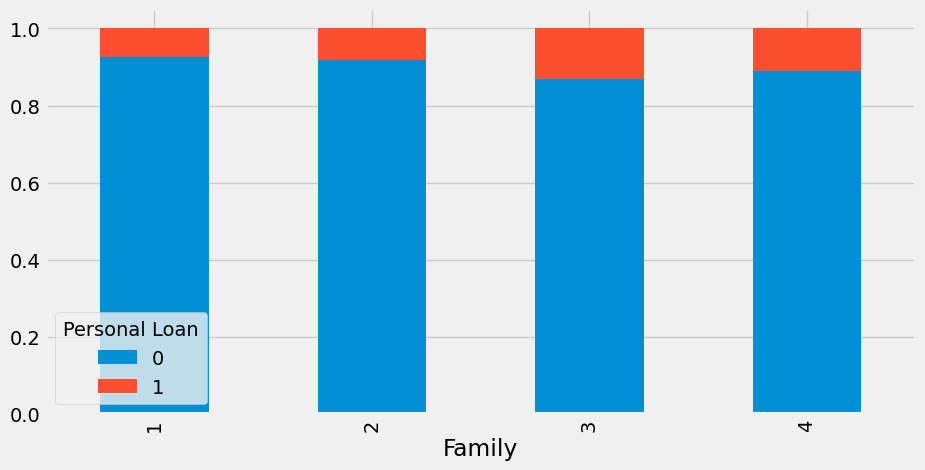

In [42]:
stacked_plot(data.Family, data['Personal Loan'])

It seems that the larger the number of family members, the higher the probability of loan acceptance, and according to the above plot, the highest loan acceptance is among people with 4 family members

Personal Loan     0    1   All  % - 0  % - 1
Education                                   
1              2003   93  2096  95.56   4.44
2              1221  182  1403  87.03  12.97
3              1295  205  1500  86.33  13.67
All            4519  480  4999  90.40   9.60


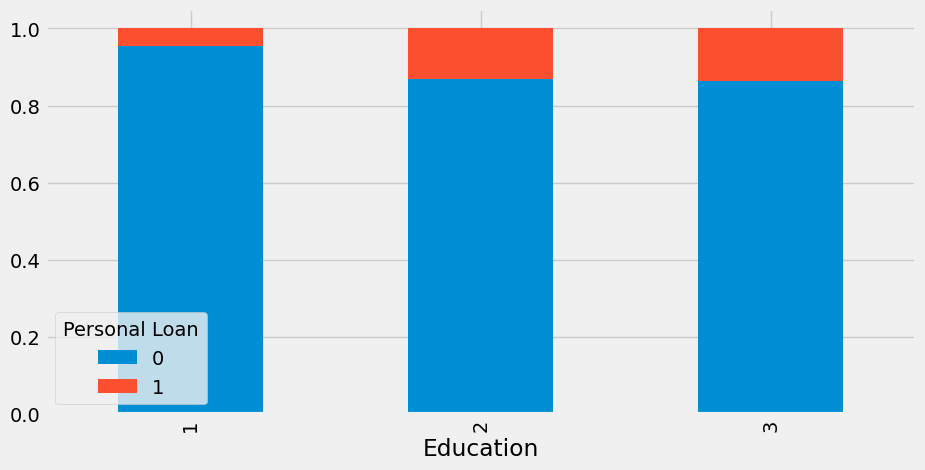

In [43]:
stacked_plot(data.Education, data['Personal Loan'])

It seems that people with grades 2 and 3 have accepted loans more than grade 1

Personal Loan          0    1   All  % - 0  % - 1
Securities Account                               
0                   4057  420  4477  90.62   9.38
1                    462   60   522  88.51  11.49
All                 4519  480  4999  90.40   9.60


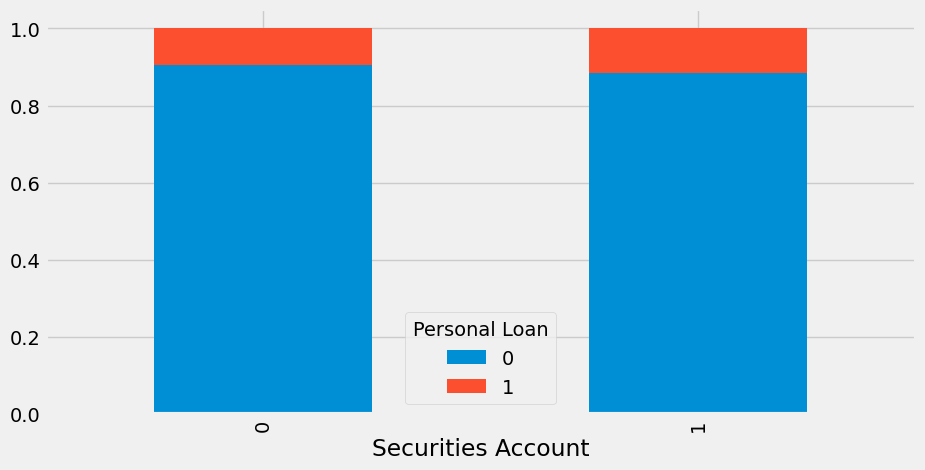

In [44]:
stacked_plot(data['Securities Account'], data['Personal Loan'])


Personal Loan     0    1   All  % - 0  % - 1
CD Account                                  
0              4357  340  4697  92.76   7.24
1               162  140   302  53.64  46.36
All            4519  480  4999  90.40   9.60


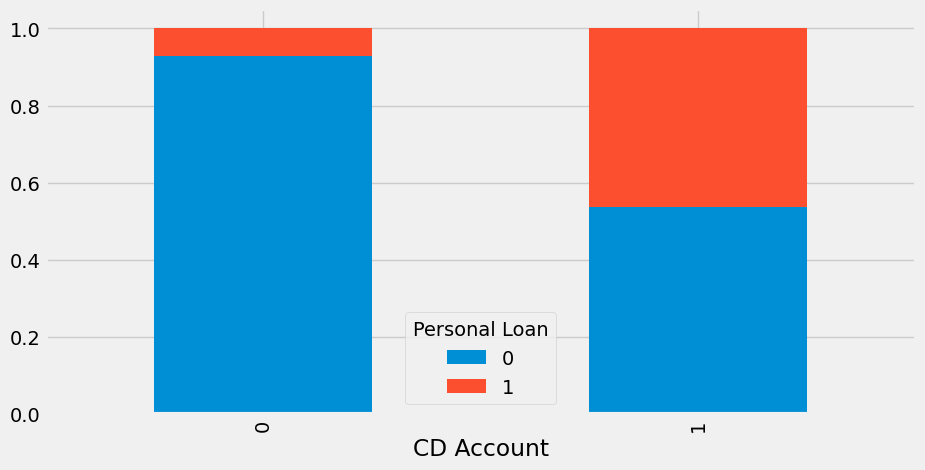

In [45]:
stacked_plot(data['CD Account'], data['Personal Loan'])


#MODEL

In [46]:
df = pd.get_dummies(data, columns=['Education', 'Family'])
df

Age  Experience  Income  ZIP Code  CCAvg  Mortgage  Personal Loan  \
0      25           1      49     91107    1.6         0              0   
1      45          19      34     90089    1.5         0              0   
2      39          15      11     94720    1.0         0              0   
3      35           9     100     94112    2.7         0              0   
4      35           8      45     91330    1.0         0              0   
...   ...         ...     ...       ...    ...       ...            ...   
4995   29           3      40     92697    1.9         0              0   
4996   30           4      15     92037    0.4        85              0   
4997   63          39      24     93023    0.3         0              0   
4998   65          40      49     90034    0.5         0              0   
4999   28           4      83     92612    0.8         0              0   

      Securities Account  CD Account  Online  CreditCard  Education_1  \
0                      1           0       0           0            1   
1                      1           0       0           0            1   
2                      0           0       0           0            1   
3                      0           0       0           0            0   
4                      0           0       0           1            0   
...                  ...         ...     ...         ...          ...   
4995                   0           0       1           0            0   
4996                   0           0       1           0            1   
4997                   0           0       0           0            0   
4998                   0           0       1           0            0   
4999                   0           0       1           1            1   

      Education_2  Education_3  Family_1  Family_2  Family_3  Family_4  
0               0            0         0         0         0         1  
1               0            0         0         0         1         0  
2               0            0         1         0         0         0  
3               1            0         1         0         0         0  
4               1            0         0         0         0         1  
...           ...          ...       ...       ...       ...       ...  
4995            0            1         1         0         0         0  
4996            0            0         0         0         0         1  
4997            0            1         0         1         0         0  
4998            1            0         0         0         1         0  
4999            0            0         0         0         1         0  

[4999 rows x 18 columns]

In [48]:
x = df.drop('Personal Loan', axis=1)
y = df.pop('Personal Loan')

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

##Logistic Regression

In [52]:
log_clf = LogisticRegression()


In [53]:
log_clf.fit(x_train, y_train)

LogisticRegression()

In [54]:
y_pred_log = log_clf.predict(x_test)
y_pred_log

array([0, 0, 1, ..., 0, 0, 0])

In [59]:
def test_model(model):
  train_pred = model.predict(x_train)
  test_pred = model.predict(x_test)
  print(f'{model} Accuracy Score on training set: {metrics.accuracy_score(y_train, train_pred)}')
  print(f'{model} Accuracy Score on test set: {metrics.accuracy_score(y_test, test_pred)}')
  print("-------------------------------------------------------------")
  print("Recall on training set : ", metrics.recall_score(y_train, train_pred))
  print("Recall on test set : ", metrics.recall_score(y_test, test_pred))
  print("-------------------------------------------------------------")
  print("F1 Score on training set : ", metrics.f1_score(y_train, train_pred))
  print("F1 Score on test set : ", metrics.f1_score(y_test, test_pred))
  print("-------------------------------------------------------------")
  print("Precision Score on training set : ", metrics.precision_score(y_train, train_pred))
  print("Precision Score on test set : ", metrics.precision_score(y_test, test_pred))

In [60]:
test_model(log_clf)

LogisticRegression() Accuracy Score on training set: 0.9102600743069449
LogisticRegression() Accuracy Score on test set: 0.902
-------------------------------------------------------------
Recall on training set :  0.32934131736526945
Recall on test set :  0.2671232876712329
-------------------------------------------------------------
F1 Score on training set :  0.41198501872659177
F1 Score on test set :  0.3466666666666666
-------------------------------------------------------------
Precision Score on training set :  0.55
Precision Score on test set :  0.4936708860759494


##KNN

In [63]:
KNN_clf = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNN_clf, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)
grid_search = grid.fit(x_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [65]:
print(grid_search.best_params_)
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(grid_search.best_score_*100) )

{'n_neighbors': 30}
Accuracy for our training dataset with tuning is : 90.37%


In [66]:
knn_model = KNeighborsClassifier(n_neighbors=30)
knn_model.fit(x_train, y_train)
y_test_hat=knn_model.predict(x_test)

In [83]:
def make_confusion_matrix(model,  y_actual, labels=[1, 0], xtest=x_test):
    """
    model : classifier to predict values of X
    y_actual : ground truth
    """
    y_predict = model.predict(x_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index=["Actual - No","Actual - Yes"],
                         columns=['Predicted - No','Predicted - Yes'])

    group_counts = [f"{value:0.0f}" for value in cm.flatten()]
    group_percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]

    labels = [f"{gc}\n{gp}" for gc, gp in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize = (10, 7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14);

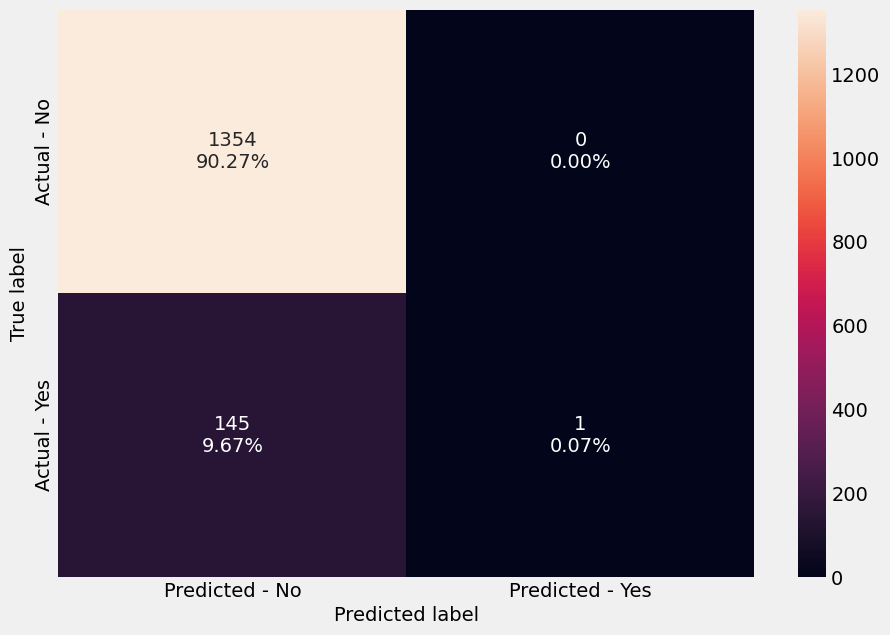

In [84]:
make_confusion_matrix(knn_model, y_test)

In [85]:
test_model(knn_model)

KNeighborsClassifier(n_neighbors=30) Accuracy Score on training set: 0.9045441554729923
KNeighborsClassifier(n_neighbors=30) Accuracy Score on test set: 0.9033333333333333
-------------------------------------------------------------
Recall on training set :  0.011976047904191617
Recall on test set :  0.00684931506849315
-------------------------------------------------------------
F1 Score on training set :  0.023391812865497078
F1 Score on test set :  0.013605442176870748
-------------------------------------------------------------
Precision Score on training set :  0.5
Precision Score on test set :  1.0


##Naive Bayes:

In [86]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)


GaussianNB()

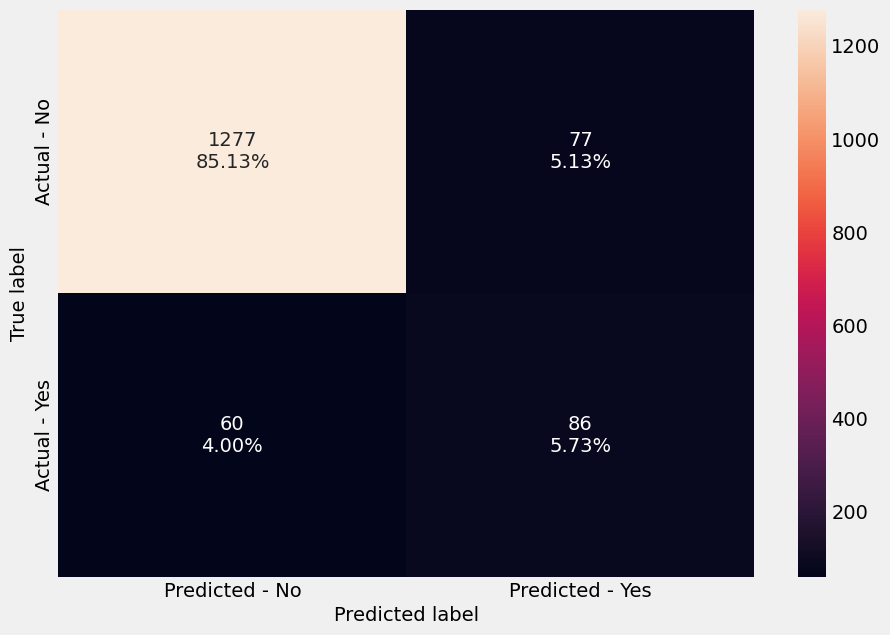

In [87]:
make_confusion_matrix(nb_model, y_test)

In [88]:
test_model(nb_model)

GaussianNB() Accuracy Score on training set: 0.9071163189482709
GaussianNB() Accuracy Score on test set: 0.9086666666666666
-------------------------------------------------------------
Recall on training set :  0.6077844311377245
Recall on test set :  0.589041095890411
-------------------------------------------------------------
F1 Score on training set :  0.5554035567715458
F1 Score on test set :  0.5566343042071198
-------------------------------------------------------------
Precision Score on training set :  0.5113350125944585
Precision Score on test set :  0.5276073619631901


##Decision Tree

In [90]:
dts_model = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(1,10),
              'criterion': ['entropy','gini'],
              'splitter': ['best','random'],
              'min_impurity_decrease': [0.000001,0.00001,0.0001],
              'max_features': ['log2','sqrt']}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dts_model, param_grid=parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
dts_model = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dts_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1)

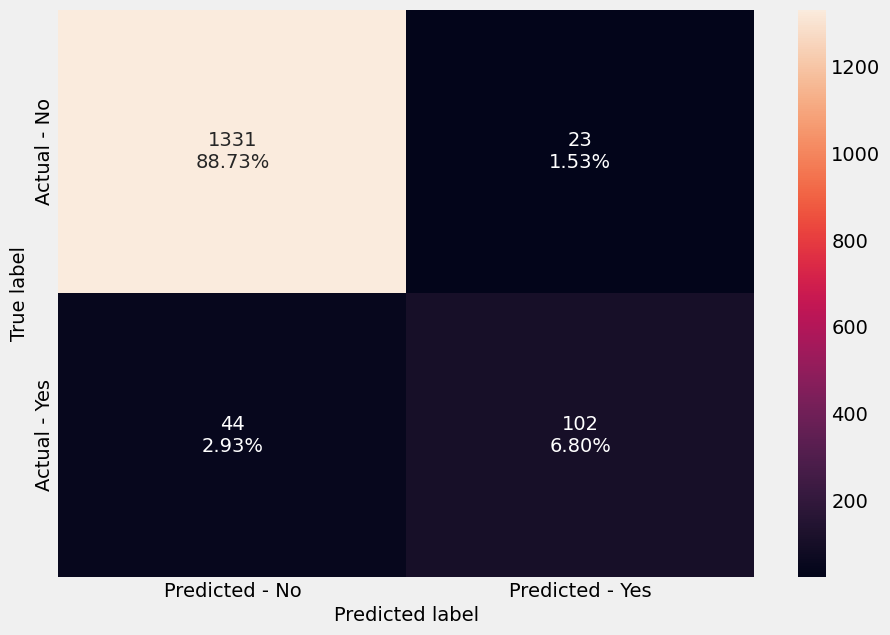

In [91]:
make_confusion_matrix(dts_model, y_test)

In [92]:
test_model(dts_model)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1) Accuracy Score on training set: 0.9805658759645614
DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1) Accuracy Score on test set: 0.9553333333333334
-------------------------------------------------------------
Recall on training set :  0.8772455089820359
Recall on test set :  0.6986301369863014
-------------------------------------------------------------
F1 Score on training set :  0.8960244648318044
F1 Score on test set :  0.7527675276752767
-------------------------------------------------------------
Precision Score on training set :  0.915625
Precision Score on test set :  0.816


In [93]:
feature_names = list(x.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Education_1', 'Education_2', 'Education_3', 'Family_1', 'Family_2', 'Family_3', 'Family_4']


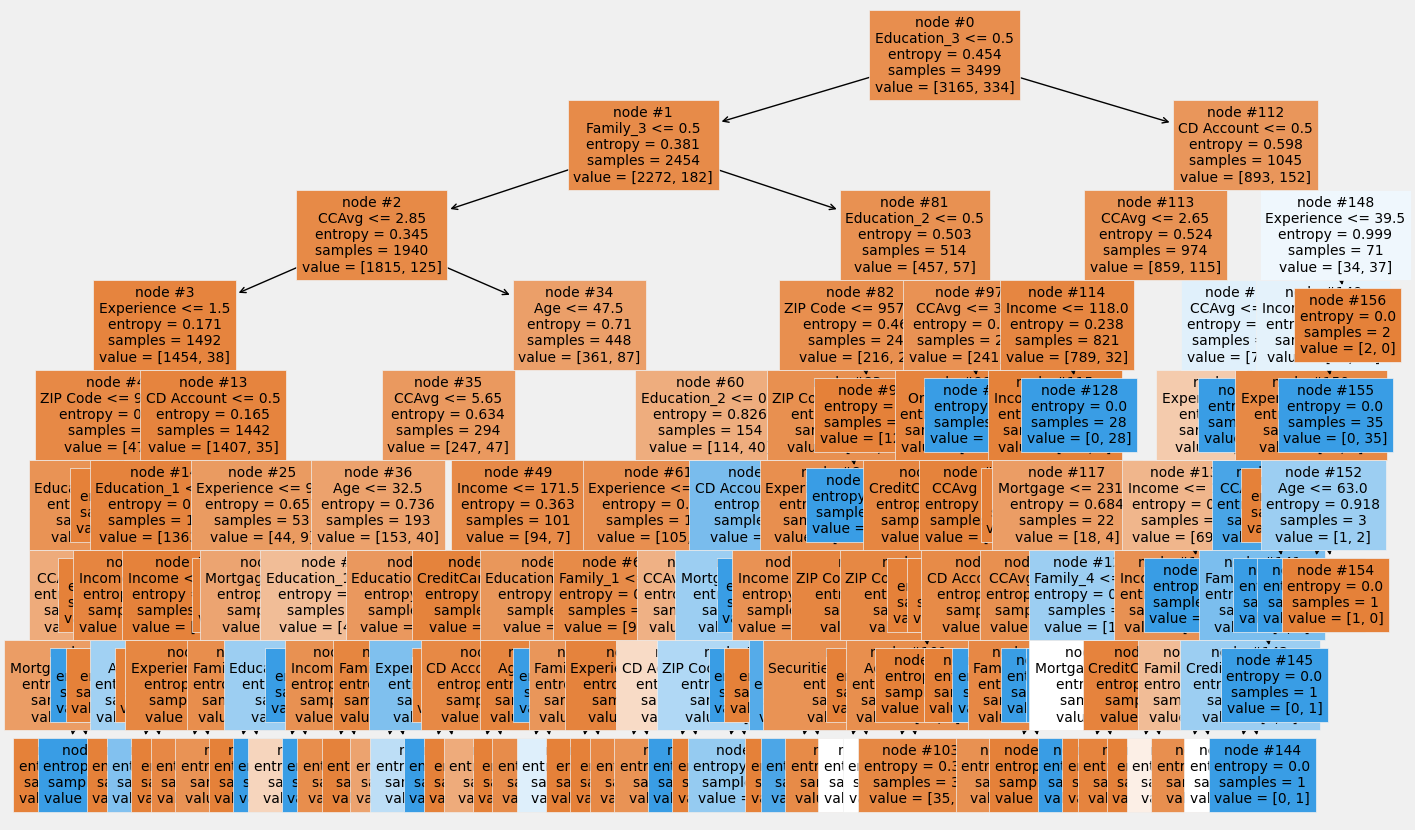

In [94]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(dts_model,
                     feature_names=feature_names,
                     filled=True,
                     fontsize=10,
                     node_ids=True,
                     class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [95]:
rf_model = RandomForestClassifier(random_state=42)
parameters = {'n_estimators': [100, 500],'max_depth': np.arange(1,10),
              'criterion': ['entropy','gini'],
              'max_features': ['log2','sqrt']}
scorer = metrics.make_scorer(metrics.recall_score)

In [96]:
grid_obj = GridSearchCV(rf_model, parameters, cv=5, scoring=scorer)
grid_obj.fit(x_train, y_train)

rf_model = grid_obj.best_estimator_

NameError: ignored

In [97]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       random_state=42)

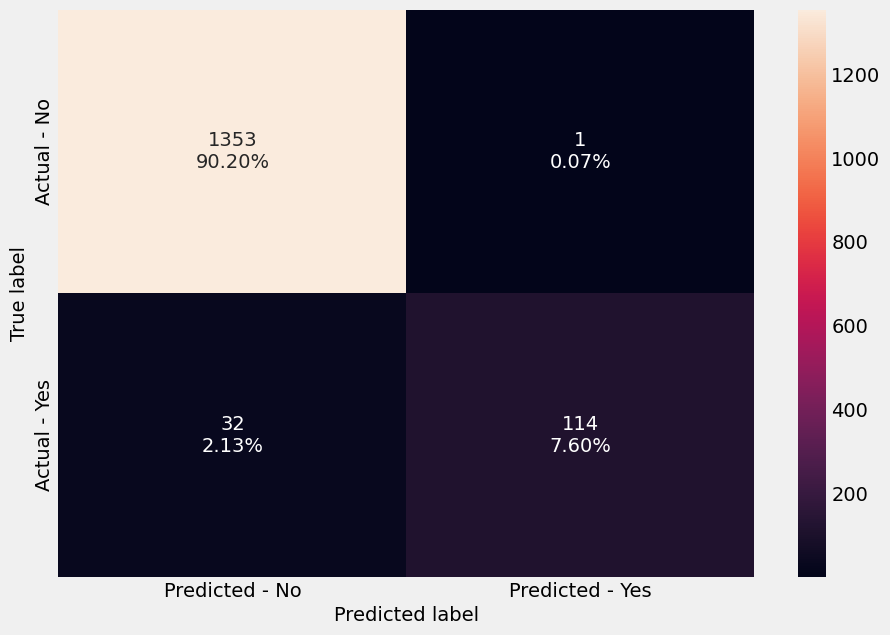

In [98]:
make_confusion_matrix(rf_model, y_test)

In [99]:
test_model(rf_model)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       random_state=42) Accuracy Score on training set: 0.995427264932838
RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       random_state=42) Accuracy Score on test set: 0.978
-------------------------------------------------------------
Recall on training set :  0.9520958083832335
Recall on test set :  0.7808219178082192
-------------------------------------------------------------
F1 Score on training set :  0.9754601226993864
F1 Score on test set :  0.8735632183908045
-------------------------------------------------------------
Precision Score on training set :  1.0
Precision Score on test set :  0.991304347826087


##SVM model

In [101]:
svm_model=SVC(kernel='rbf',C=10)
# Grid of parameters to choose from
parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)
# Run the grid search
grid_obj = GridSearchCV(svm_model, param_grid=parameters, scoring=scorer,refit = True, verbose = 1)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
svm_model = grid_obj.best_estimator_

# Fit the best algorithm to the data.
svm_model.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


SVC(C=1000, gamma=0.0001)

In [102]:
# print best parameter after tuning
print(grid_obj.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_obj.best_estimator_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.0001)


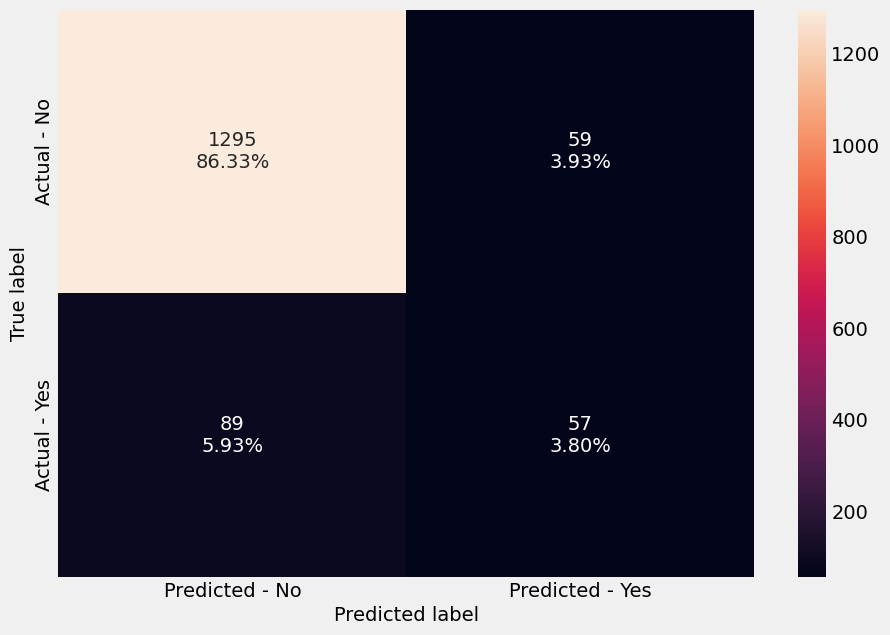

In [103]:
make_confusion_matrix(svm_model, y_test)

In [104]:
test_model(svm_model)

SVC(C=1000, gamma=0.0001) Accuracy Score on training set: 0.9971420405830237
SVC(C=1000, gamma=0.0001) Accuracy Score on test set: 0.9013333333333333
-------------------------------------------------------------
Recall on training set :  0.9730538922155688
Recall on test set :  0.3904109589041096
-------------------------------------------------------------
F1 Score on training set :  0.9848484848484848
F1 Score on test set :  0.4351145038167939
-------------------------------------------------------------
Precision Score on training set :  0.9969325153374233
Precision Score on test set :  0.49137931034482757
